# Priority Classification Model
## Smart Civic Issue & Waste Management System

This notebook builds a priority classification model to assist municipal
authorities in identifying high-urgency civic complaints.

The model uses engineered spatial and categorical features to classify
complaints into LOW, MEDIUM, and HIGH priority levels.

Important Notes:
- This model is decision-support oriented, not fully automated enforcement.
- Interpretable machine learning models are preferred for transparency.

## 1. Importing Required Libraries

This section imports libraries required for model training, evaluation,
and result generation.

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

## 2. Loading Engineered Feature Dataset

The processed dataset generated from the feature engineering stage is loaded.
This dataset contains numerical features suitable for ML modeling.

In [7]:
df = pd.read_csv("data/processed/features_data.csv")
df.head()

,ID,category_encoded,status_encoded,density_score,category_frequency,is_pending,risk_signal,Latitude,Longitude
0,1,0,2,0.295490,214,1,0.577294,23.257167,77.413640
1,2,3,1,0.170649,497,0,0.102390,23.258523,77.415287
2,3,1,1,0.246742,425,0,0.148045,23.256676,77.411646
3,4,3,1,0.099254,497,0,0.059552,23.261520,77.407977
4,5,2,2,0.176402,311,1,0.505841,23.257405,77.412233


## 3. Defining Priority Labels

Since labeled priority data is not available, priority classes are derived
using domain-informed rules based on complaint density, status, and risk signal.

This approach is known as rule-based bootstrapping and is acceptable for
decision-support systems.

In [9]:
def assign_priority(row):
    if row['risk_signal'] >= 0.7:
        return 2   # HIGH
    elif row['risk_signal'] >= 0.4:
        return 1   # MEDIUM
    else:
        return 0   # LOW

df['priority_label'] = df.apply(assign_priority, axis=1)
df[['risk_signal', 'priority_label']].head()

,risk_signal,priority_label
0,0.577294,1
1,0.102390,0
2,0.148045,0
3,0.059552,0
4,0.505841,1


0 → LOW priority
1 → MEDIUM priority
2 → HIGH priority

## 4. Priority Class Distribution

This section checks whether priority classes are reasonably balanced.

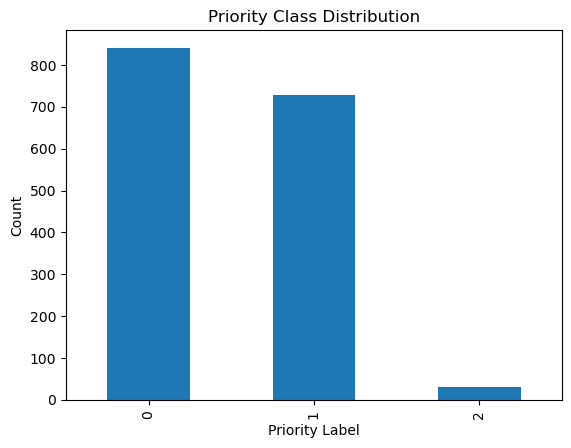

In [12]:
df['priority_label'].value_counts().plot(kind='bar')
plt.title("Priority Class Distribution")
plt.xlabel("Priority Label")
plt.ylabel("Count")
plt.show()

## 5. Feature Selection for Priority Model

The following features are selected based on EDA insights and domain relevance.

In [14]:
X = df[
    [
        'category_encoded',
        'status_encoded',
        'density_score',
        'category_frequency',
        'is_pending',
        'risk_signal'
    ]
]

y = df['priority_label']

## 6. Train–Test Split

The dataset is split into training and testing subsets to evaluate
model generalization.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 7. Training the Priority Classification Model

A Decision Tree classifier is used due to its interpretability and
suitability for governance-oriented decision systems.

In [18]:
model = DecisionTreeClassifier(
    max_depth=4,
    random_state=42
)

model.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",4
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

## 8. Model Evaluation

This section evaluates the trained model using accuracy and class-wise metrics.

In [20]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00       146
           2       1.00      1.00      1.00         5

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



## 9. Risk Score Generation

Priority labels are converted into a human-readable risk score to support
dashboard visualization and decision-making.

In [22]:
priority_to_risk = {
    0: 3,   # LOW
    1: 6,   # MEDIUM
    2: 9    # HIGH
}

df['risk_score'] = df['priority_label'].map(priority_to_risk)
df[['priority_label', 'risk_score']].head()

,priority_label,risk_score
0,1,6
1,0,3
2,0,3
3,0,3
4,1,6


## 10. Human-Readable Priority Levels

Numeric labels are converted into descriptive priority levels.

In [24]:
priority_names = {
    0: "LOW",
    1: "MEDIUM",
    2: "HIGH"
}

df['priority_level'] = df['priority_label'].map(priority_names)
df[['priority_level', 'risk_score']].head()

,priority_level,risk_score
0,MEDIUM,6
1,LOW,3
2,LOW,3
3,LOW,3
4,MEDIUM,6


## 11. Saving Priority Model Results

The priority classification results are saved for dashboard integration
and reporting.

In [26]:
output_cols = [
    'ID',
    'priority_label',
    'priority_level',
    'risk_score'
]

df[output_cols].to_csv(
    "data/processed/priority_results.csv",
    index=False
)

print("priority_results.csv saved successfully.")

priority_results.csv saved successfully.


## 12. Summary of Priority Classification Model

### Model Highlights:
- Interpretable Decision Tree classifier
- Rule-bootstrapped priority labels
- Spatial density and status-aware risk scoring

### Practical Impact:
- Enables authorities to triage complaints effectively
- Reduces manual inspection overhead
- Supports transparent and ethical decision-making

The next stage applies spatial clustering for hotspot detection.